<h2>Lab 3 - Principal Component Analysis (PCA)</h2>

In this lab we will reduce the dimension of a problem by computing the problem's the principal components. This has applications in image compression, data visualization, and machine learning. Before processing with this lab, I recommend you read the following tutorial on PCA: https://eclass.srv.ualberta.ca/mod/resource/view.php?id=4651473

In the first part of this lab you will walkthrough an implementation of PCA on an artificial domain, where we will reduce the dimensionality of the problem from 2 to 1. Then, you will implement the same algorithm to reduce the dimensionality of a classification problem from 4 to 2. 

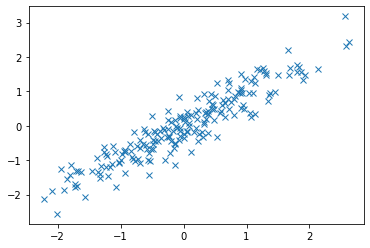

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

'''
We are going to create an artificial dataset with 200 data points in 2D space (2 features). 

When using PCA we need to standardized the data by transforming it to having mean = 0. 
This is important because in PCA we will be looking at how different features contribute 
to the spread of the data. Therefore, different features must be comparable in terms of scale. Here we show 
how to standardize the data. Then, we visualize the artificial dataset we created. 
'''
mean = [0, 0]
cov = [[1.25, 0.75], [0.75, 0.5]]

x = np.random.multivariate_normal(mean, cov, 200).T + np.array([random.uniform(2, 10), random.uniform(2, 10)]).reshape(2, 1)

mean_x = np.mean(x, axis = 1).reshape(2, 1)
std_x = np.std(x, axis = 1).reshape(2, 1)
x = (x - mean_x)/std_x

plt.plot(x[0], x[1], 'x')
plt.show()

eigenvalues: 
[1.942505   0.06754525]
eigenvectors: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


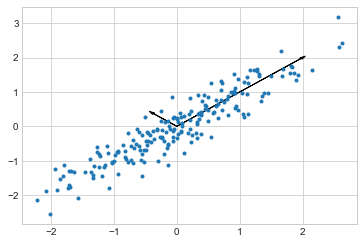

In [2]:
'''
The principal components of a dataset is given by the eigenvectors of the
covariance matrix of the dataset (see the tutorial link above for details). 
'''
cov_x = np.cov(x)
w, v = np.linalg.eig(cov_x)
print('eigenvalues: ')
print(w)
print('eigenvectors: ')
print(v)

'''
While the eigenvectors give us the direction of the principal components of the data, 
the eigenvalues give us the magnitude of each component. In the plot below each arrow
points in the direction of the two principal components of the data. The length of each arrow
is given by two times the square root of the eigenvalue associated with the eigenvector. The arrows 
delimite an ellipse that contains all points withing one standard deviation from the mean.
'''
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(x[0], x[1], '.')
    ax.arrow(0, 0, v[0][0] * 2 * np.sqrt(w[0]), v[1][0] * 2 * np.sqrt(w[0]), head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, v[0][1] * 2 * np.sqrt(w[1]), v[1][1] * 2 * np.sqrt(w[1]), head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.show()

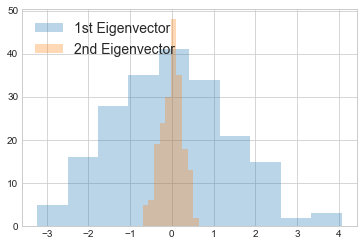

In [3]:
'''
Most of the spread in the data above in explained by the eigenvector associated with the largest
eigenvalue (longest arrow above shows the component).

We can now project the original data onto a space defined by the first or the second eigenvectors. 
If we were dealing with a d-dimensional space, we could choose the k < d eigenvectors associated with 
the k largest eigenvalues and make them the column vectors of a projection matrix M. The transformed 
data would then be given by

x_transform = x.T.dot(M)

In our artificial example we will simply multiply of data x by each eigenvector and then 
visualize the transformed data onto this 1-dimensional space represented by a histogram. 

The histogram  shows that the space given by the dominant eigenvector has the largest spread in the data. 
If we were to choose between the two 1-dimensional spaces, we would choose the space given by the dominant 
eigenvector because it better preserves the variance of the data.
'''
transform_1_x = x.T.dot(v[:,0])
transform_2_x = x.T.dot(v[:,1])

with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x, alpha=0.3, label="1st Eigenvector")
    plt.hist(transform_2_x, alpha=0.3, label="2nd Eigenvector")
    plt.legend(loc='upper left', fontsize=14)

    plt.show()

<h3>PCA on the Iris Problem</h3>

You will implement the same algorithm shown above in the problem of classifying different species of iris based on features of their flowers. Each flower is described according to four different features: the width and length of both sepal and petal of the flower. 

The goal of this exercise is to apply PCA to the iris dataset and reduce its dimensionality from 4 to 2. PCA will discover a linear combination of the original 4 features that project the problem onto a 2D space while preserving as much of the variance of the dataset as possible. Once we we project the original dataset onto the lower dimensional space we will be able to visualize in 2D the distribution of the samples according to their species. 

This exercise illustrates the process one could use to better visualize a dataset or the process of generating a low-dimensional projection of a high-dimensional problem that will be better suited for training machine learning models. 

In [4]:
'''
Here we download the dataset and store it in a Pandas variable called 'dataset'. To learn more about Pandas,
see the following tutorial: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
'''
import pandas as pd

dataset = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                    header=None,
                    sep=',')

# extracting features (sepal length, sepal width, petal length, petal width)
features = dataset.iloc[:, 0:4].values

# extracting the label of each sample
labels = dataset.iloc[:,4].values

# print(dataset)
# print(features)
# print(labels)

[link text](https://)Implement the PCA algorithm as shown in the artificial example for the Iris domain. For that, follow the steps.

1. Standardize the dataset
2. Compute the covariance matrix
3. Compute the eigenvectors and eigenvalues
4. Select the two eigenvectors associated with the largest eigenvalues
5. Create a matrix M whose columns are formed by the eigenvectors selected in (4)
6. Project the original dataset onto the lower dimensional space give by M
7. Plot the data in the 2-dimensional space given by the principal components. Make sure that samples with different labels have different colors in the plot. 

Observe the results and answer the question. Are you able to distinguish different species in the lower-dimensional space? 

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import deepcopy
# from sklearn.preprocessing import scale

# find the mean of data
mean_x = np.mean(features, axis = 0).reshape(4,1)
print('Mean: ', mean_x.T)

# make mean equals 0
c_x = features.T - mean_x
# print(c_x)

# find the standered deviation
std_x = np.std(c_x, axis = 1).reshape(4,1)
# scaled_train_features = scale(features)
print('Std. Dev.: ', std_x.T)

# print(scaled_train_features.std(axis = 0))
# print(c_x/std_x)

# standardized the data by transforming it to having mean = 0
x = c_x/std_x
# x = scaled_train_features.T
print(x.shape)

Mean:  [[5.84333333 3.054      3.75866667 1.19866667]]
Std. Dev.:  [[0.82530129 0.43214658 1.75852918 0.76061262]]
(4, 150)


In [6]:
# find the covariance
cov_x = np.cov(x)
print('covariance matrix:')
print(cov_x)

# find eigenvalues and eigenvectors
w, v = np.linalg.eig(cov_x)
print('eigenvalues: ')
print(w)
print('eigenvectors: ')
print(v)

# sort eigenvalues, eigenvectors from large to small
order = np.argsort(w)[::-1]
w_sort = w[order]
v_sort = v[:,order]
# print(w_sort)
# print(v_sort)


covariance matrix:
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
eigenvalues: 
[2.93035378 0.92740362 0.14834223 0.02074601]
eigenvectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [7]:
# find the projection matrix M, which choose the k < d eigenvectors
# associated with the k largest eigenvalues and make them the column vectors
M = v_sort[:,:2]
print(M)
x_new = x.T.dot(M)
print(x_new.shape)
n = 150


[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]
(150, 2)


In [8]:
# set label: Iris-setosa
transform_1_x = x_new[0:50].T

# set label: Iris-versicolor
transform_2_x = x_new[51:100].T

# set label: Iris-virginica
transform_3_x = x_new[101:150].T

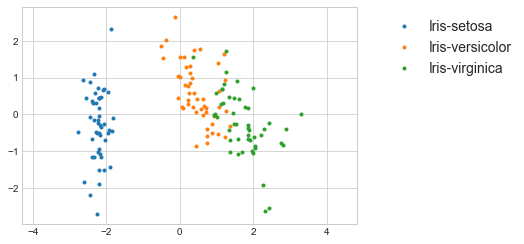

In [9]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    ax.set_aspect('equal', 'datalim')
    plt.plot(transform_1_x[0], transform_1_x[1], '.', label='Iris-setosa')
    plt.plot(transform_2_x[0], transform_2_x[1], '.', label='Iris-versicolor')
    plt.plot(transform_3_x[0], transform_3_x[1], '.', label='Iris-virginica')
    plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', fontsize=14)
    plt.show()

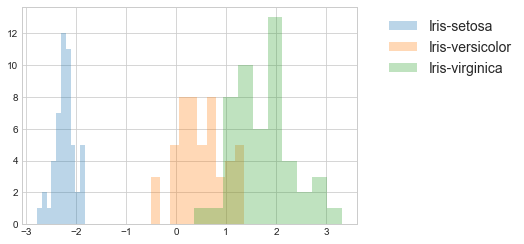

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.hist(transform_1_x[0], alpha=0.3, label='Iris-setosa')
    plt.hist(transform_2_x[0], alpha=0.3, label='Iris-versicolor')
    plt.hist(transform_3_x[0], alpha=0.3, label='Iris-virginica')
    plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', fontsize=14)
    plt.show()

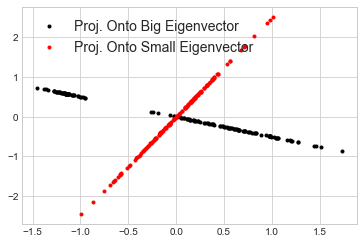

In [11]:
# basic vector projection. 
# we don't need to divide since they're already unit vectors
xt1v = x.T.dot(v_sort[:,0]).reshape(n, 1).dot(v_sort[:,0].reshape(1, 4))
xt2v = x.T.dot(v_sort[:,1]).reshape(n, 1).dot(v_sort[:,1].reshape(1, 4))

# print(xt1v)
# print(xt2v)
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[:, 0], xt1v[:, 1], '.', label='Proj. Onto Big Eigenvector', color='k')
    plt.plot(xt2v[:, 0], xt2v[:, 1], '.', label='Proj. Onto Small Eigenvector', color='r')
    plt.legend(loc='upper left', fontsize=14)
    plt.show()


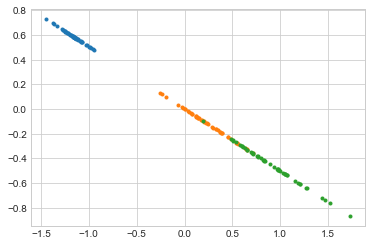

In [12]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt1v[0:50, 0], xt1v[0:50, 1], '.')
    plt.plot(xt1v[51:100, 0], xt1v[51:100, 1], '.')
    plt.plot(xt1v[101:150, 0], xt1v[101:150, 1], '.')
    plt.show()

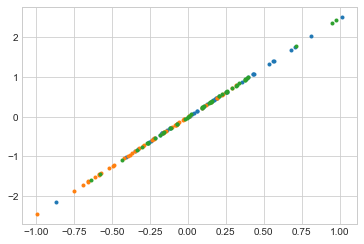

In [13]:
with plt.style.context('seaborn-whitegrid'):
    ax = plt.axes()
    plt.plot(xt2v[0:50, 0], xt2v[0:50, 1], '.')
    plt.plot(xt2v[51:100, 0], xt2v[51:100, 1], '.')
    plt.plot(xt2v[101:150, 0], xt2v[101:150, 1], '.')
    plt.show()